<div>
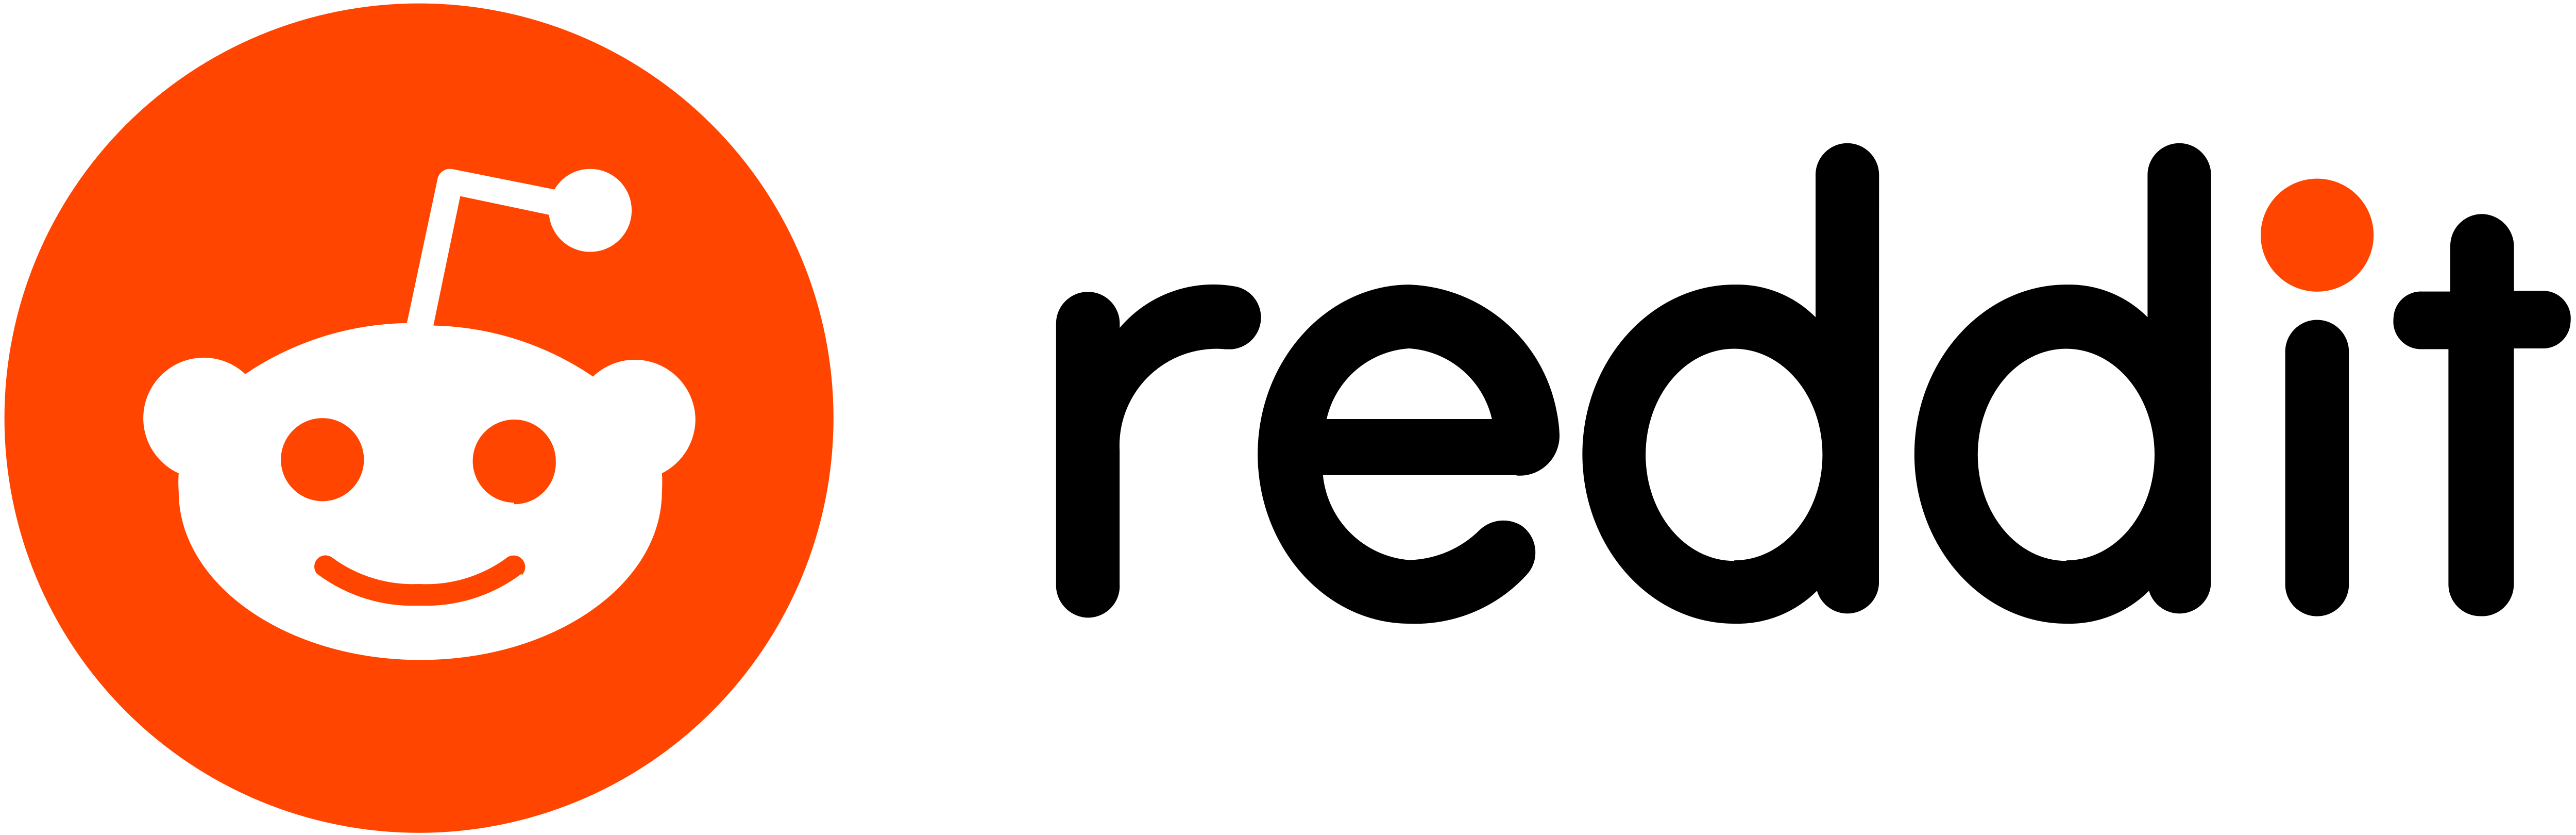
</div>

# Comment Sentiment Analysis by Julia Hoffman
This purpose of this notebook is to analyze a specified users comment sentiment (i.e. positive or negative connotation). The comment_sentiment_analysis() function takes in three parameters:
1. username: a string of the Reddit username you would like to analyze - give it a try with your username:)
2. comment_limit: the number of most recent comments you would like to fetch 
3. top_limit: the number of top positive and negative comments you want to display 


In [9]:
# Import praw packages to pull reddit data
import pandas
from os.path import isfile
import praw
import pandas as pd
from time import sleep
from collections import defaultdict

# Importing packages for sentiment analysis and visuals
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
from collections import defaultdict

# Get credentials from DEFAULT instance in praw.ini
reddit = praw.Reddit('DEFAULT') # creating a reddit instance


In [13]:
def comment_sentiment_analysis(username,comment_limit, top_limit):
    # Get user object
    user = reddit.redditor(username)

    # Getting comment data 
    from collections import defaultdict
    ucomm_dict = defaultdict(list)

    # Iterate over user comment object and store in dictionary 
    for comment in user.comments.top(limit=comment_limit):
        ucomm_dict['subreddit'].append(comment.subreddit)
        ucomm_dict['score'].append(comment.score)
        ucomm_dict['id'].append(comment.id)
        ucomm_dict['body'].append(comment.body)
        analyzer = SentimentIntensityAnalyzer()
    
    # Adding user data into a dataframe
    ucomm_data = pd.DataFrame(ucomm_dict)
    
    # Making an empty dictionary
    from collections import defaultdict
    sents_dict = defaultdict(list)

    # Adding data to the dictionary
    for sentence in ucomm_data.body:
        vs = analyzer.polarity_scores(sentence)
        sents_dict['pos'].append(vs['pos'])
        sents_dict['neg'].append(vs['neg'])
        sents_dict['neu'].append(vs['neu'])

    # Create a dataframe from a dictionary
    scores = pandas.DataFrame(sents_dict)

    # Concatnating data with sentiment scores 
    finalframe = pandas.concat([ucomm_data, scores], axis=1)
    finalframe.subreddit = finalframe.subreddit.astype('str') 
    
    # Sorting finalframe by the top positive and negative sentiment scores
    positive = finalframe.sort_values(by = 'pos', ascending = False).iloc[0:top_limit, :].reset_index(drop=True)
    negative = finalframe.sort_values(by = 'neg', ascending = False).iloc[0:top_limit, :].reset_index(drop=True)
    
    from IPython.core.display import display, HTML
    display(HTML('<h1>Analyzing ' + str(comment_limit) + ' of ' + username + "'s most recent comments...</h1>"))
    
    import numpy as np
    from PIL import Image
    # Import package
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    text = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(finalframe.body.to_string())

    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off")
        plt.show();

    plot_cloud(text)
    
    #Printing top positive comments
    display(HTML("<h2>Here are " + username + "'s Top " + str(top_limit) + " Positive Comments</h2>"))
    for i in positive.index:
        print('"', positive.loc[i,'body'], '"', ', Positive:', positive.loc[i, 'pos'], ', Negative:', 
              positive.loc[i,'neg'],', Neutral:', positive.loc[i,'neu'])

    # Printing top negative comments 
    display(HTML("<h2>Here are " + username + "'s Top " + str(top_limit) +  " Negative Comments</h2>"))
    for i in negative.index:
        print('"', negative.loc[i,'body'], '"', ', Positive:', negative.loc[i, 'pos'], ', Negative:', 
              negative.loc[i,'neg'],', Neutral:', negative.loc[i,'neu']) 
    
    
    # Finding averages 
    pos_ave = round(np.average(finalframe.pos),2)
    neg_ave = round(np.average(finalframe.neg),2)
    neu_ave = round(np.average(finalframe.neu),2)
    
    # Printing average scores 
    display(HTML("<h2> " + username + "'s comments average a " + str(pos_ave) + ' positive score, a ' + str(neg_ave) + ' negative score, and a ' + str(neu_ave) + " neutral score</h2>"))
    
    # Plotting the distrbution of positive and negative sentiment 
    import plotly.express as px
    fig = px.box(finalframe, x="subreddit", y="pos", color="subreddit",
                 title="Distribution of Comment Positivity per Subreddit",
                 hover_data=["pos"]
                )
    fig.show()
    fig2 = px.box(finalframe, x="subreddit", y="neg", color="subreddit",
                 title="Distribution of Comment Negativity per Subreddit",
                 hover_data=["neg"] 
                )
    fig2.show()
        

## An example with spez
This example displays spez's analyzes spez's most recent 100 comments on reddit. A wordcloud is displayed that shows the most frequently used words. The five most positive and negative comments are printed. The average sentiment score is computed. Then an interative box plot is displayed to show the spread of positivity and negativity per subreddit commented on. Feel free to try it with your own username, comment limit, and top limit (keep in mind that comment limit is limited by praw's pull requests). Enjoy!!

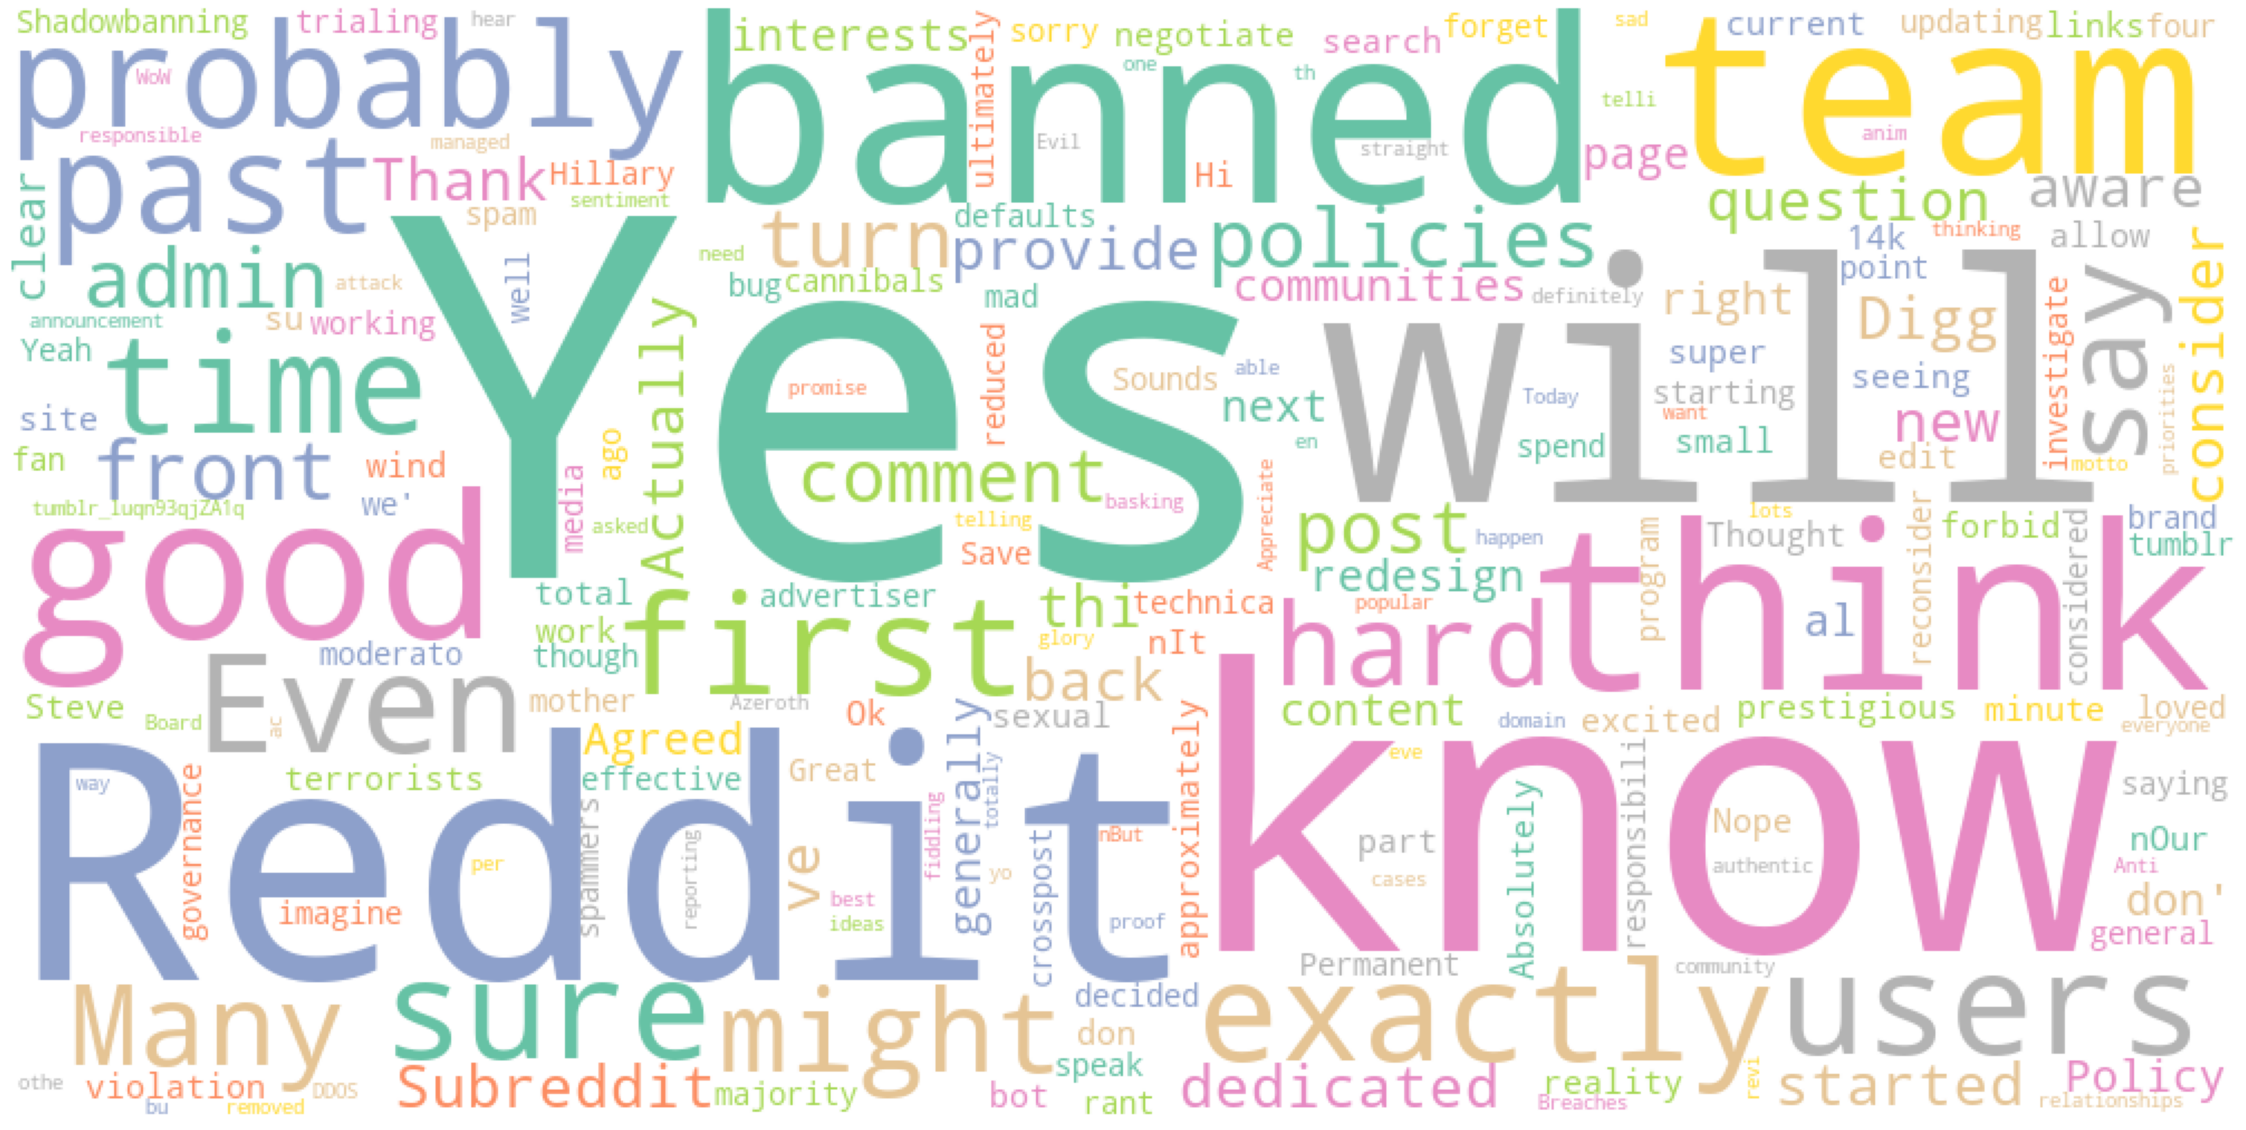

" Agreed. " , Positive: 1.0 , Negative: 0.0 , Neutral: 0.0
" Yes " , Positive: 1.0 , Negative: 0.0 , Neutral: 0.0
" good bot " , Positive: 0.744 , Negative: 0.0 , Neutral: 0.256
" Thank you! " , Positive: 0.736 , Negative: 0.0 , Neutral: 0.264
" Would be about as effective... " , Positive: 0.437 , Negative: 0.0 , Neutral: 0.563


" No. We don’t negotiate with terrorists.  " , Positive: 0.0 , Negative: 0.451 , Neutral: 0.549
" Yes! Even though we've reduced spam by about 90% the last couple of quarters, it's still an ongoing battle. Please report any spam that you see.

e: thanks for the reports, assholes. " , Positive: 0.177 , Negative: 0.262 , Neutral: 0.561
" We'll consider banning subreddits that clearly violate the guidelines in my post--the ones that are illegal or cause harm to others.

There are many subreddits whose contents I and many others find offensive, but that alone is not justification for banning.

/r/rapingwomen will be banned. They are encouraging people to rape.

/r/coontown will be reclassified. The content there is offensive to many, but does not violate our current rules for banning.

edit: elevating my reply below so more people can see it.

 " , Positive: 0.094 , Negative: 0.234 , Neutral: 0.672
" Azeroth. WoW is a DDOS attack on human productivity. " , Positive: 0.273 , Negative: 0.223

In [12]:
comment_sentiment_analysis('spez', 100, 5)